<a href="https://colab.research.google.com/github/Shourya306/Unsupervised-Machine-Learning/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name.
* ### Quantity: The quantities of each product (item) per transaction.
* ### InvoiceDate: Invoice Date and time. The day and time when each transaction was generated.
* ### UnitPrice: Unit price. Product price per unit in sterling.
* ### CustomerID: Customer number. A 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. The name of the country where each customer resides.

In [122]:
# Importing the pre-requisite libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import datetime as dt
import math

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')   # Code to ensure that python dosesn't give any warnings.

pd.set_option('max_columns', None) # Code to ensure that all the columns in the dataframe are shown.

plt.rcParams["figure.figsize"] = (20, 10) # Changing the deafult size of the visualization.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
# Importing the dataset.

retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail Customer Segmentation - Challa Shourya Chandra Sai/Online Retail.xlsx')

In [125]:
# Inspecting the dataset.

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [126]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [127]:
# Understanding the basic stats.

retail_df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [128]:
# Checking out the datatype of all the columns.

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Defining The Problem Statement.**

*Understanding the difference between numeric[continuous variables and discrete variables] & categorical variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Discrete variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

**Categorical variables** - These are those variables whose values are of string datatype or binary in nature and they assume distinct set of values.


*Segregating the variables into categorical, continuous/discrite, datetime and, textual in nature.*

Variables:

* InvoiceNo = It is categorical and Nominal in nature.

* StockCode = It is categorical and Nominal in nature.

* Description = It is textual in nature. 

* Quantity = It is continuous in nature.

* InvoiceDate: It is of Datetime in nature.

* UnitPrice: It is continuous in nature.

* CustomerID: It is categorical and Nominal in nature.

* Country: It is categorical and Nominal in nature.

## **Data Preprocessing**

In this section, I will be treating the null values, dublicated rows and also dropping those orders that have been cancelled by the customers. 

**Note:** Outliers in the data are not removed because we need that data to rank the customers using RFM.

In [129]:
# Checking for duplicate rows.

duplicate_check = retail_df[retail_df.duplicated()]
print(f'The number of duplicate rows in the dataset are {len(duplicate_check)}')

The number of duplicate rows in the dataset are 5268


In [130]:
# Removing all these rows.

retail_df = retail_df[~retail_df.duplicated()]
print('The shape of the dataset after removing duplicates are {0}'.format(retail_df.shape))

The shape of the dataset after removing duplicates are (536641, 8)


In [131]:
# Checking for null values and removing them.

print('The number of null values in each column are as the following: \n')
retail_df.isnull().sum()

The number of null values in each column are as the following: 



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Columns Description and CustomerID have null values. The only way to deal with this is to remove those rows that have null values. Because you can compute CustomerID(unique idenfication number) & Description.

In [132]:
# Dropping all the rows that have null values.

retail_df.dropna(inplace = True)
print('The shape of dataset after dropping null values is {0}'.format(retail_df.shape))

The shape of dataset after dropping null values is (401604, 8)


Even after removing dublicate and null values, we still have a ton of data to play around with.

In [133]:
# Dropping those orders that have been cancelled by the customers.

cancel_df = retail_df[retail_df['InvoiceNo'].str.contains('C',na = False)]
print('The number of cancelled orders by the customers are {0}'.format(len(cancel_df)))

retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C',na = False)]

The number of cancelled orders by the customers are 8872


Removing cancelled orders because it makes zero sense to consider these observations for RFM analysis.

## **Feature Engineering**

Feature engineering refers to the process of creating new features from exisitng features in the dataset.

In [134]:
# Feature Engineering the Total_Price column.

retail_df['Total_Price'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


The Total_Price can be used to calulate the monetary value of each customer.

In [135]:
# Feature engineering the Last_Purchase column.

assumed_date = dt.datetime(2011,12,10)
retail_df['Last_Purchase'] = (assumed_date - retail_df['InvoiceDate']).dt.days
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


The Last_Purchase column can be used to calculate the recency value of each customer.

In [137]:
# Feature engineering the InvoiceDate column

retail_df['year'] = retail_df['InvoiceDate'].dt.year
retail_df['month'] = retail_df['InvoiceDate'].dt.month
retail_df['day'] = retail_df['InvoiceDate'].dt.day_name()
retail_df['hour'] = retail_df['InvoiceDate'].dt.hour

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8


I have extracted various information from the invoice column for EDA.

## **EDA**

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns using Visualization. 

In [138]:
# Understaing the distribution of various columns in the dataset.

columns = list(retail_df.describe(include = ['int64','float64']).columns)
columns.pop(2) # Removing customerID from the list.

'CustomerID'

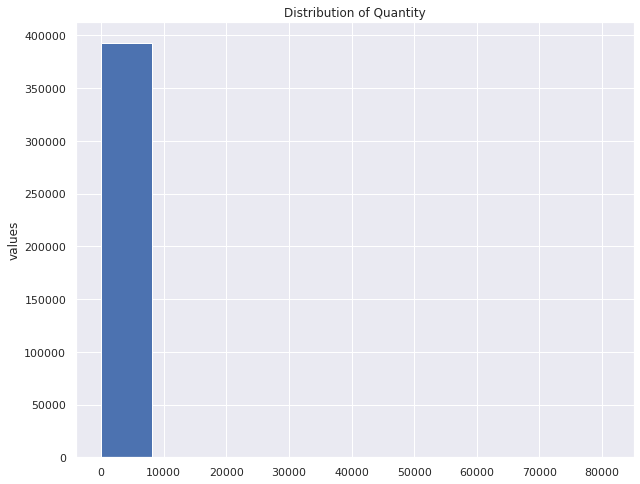

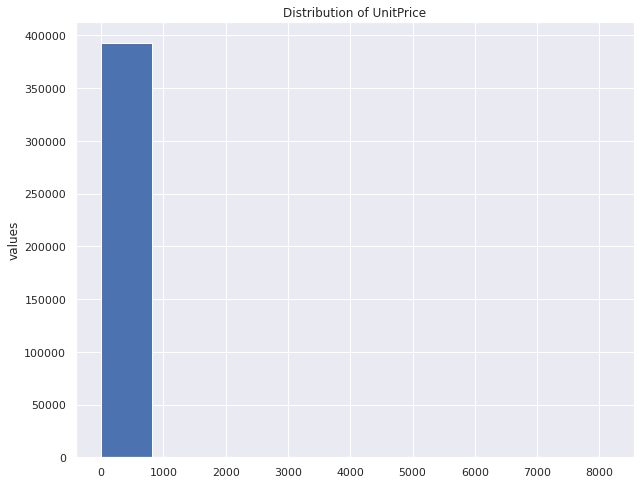

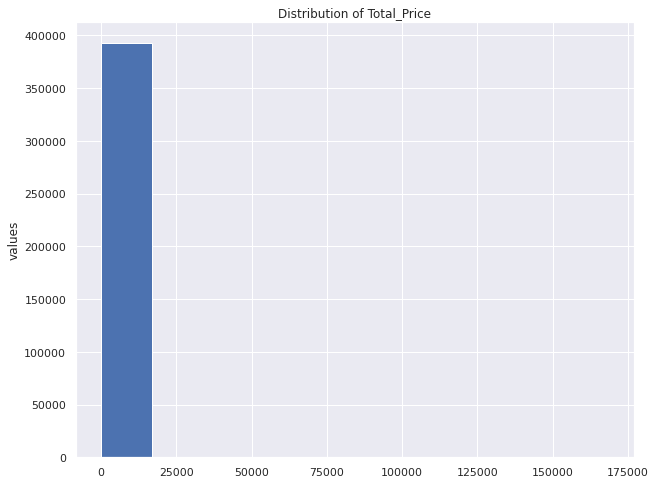

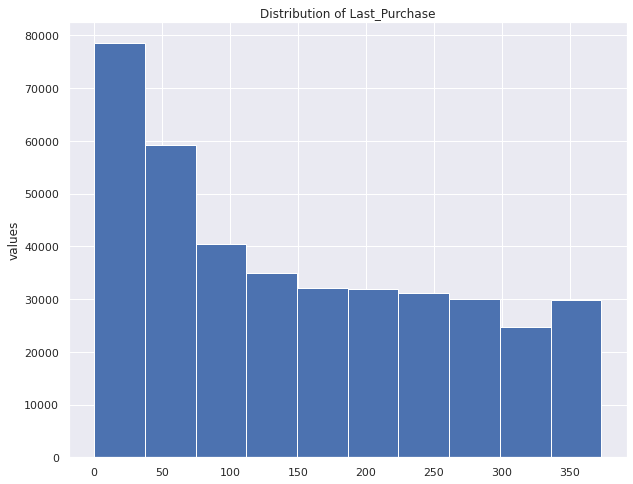

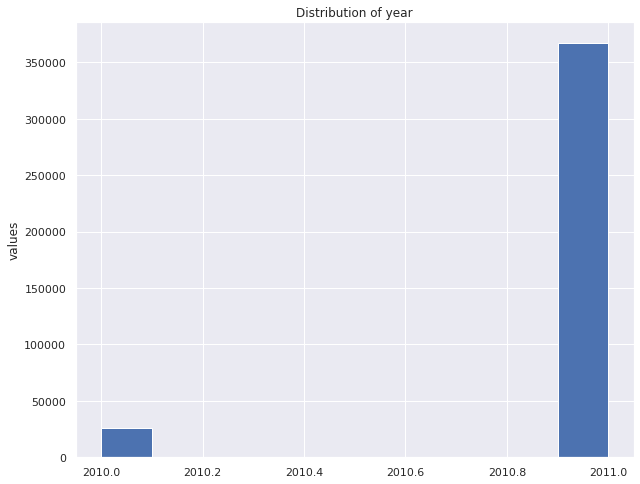

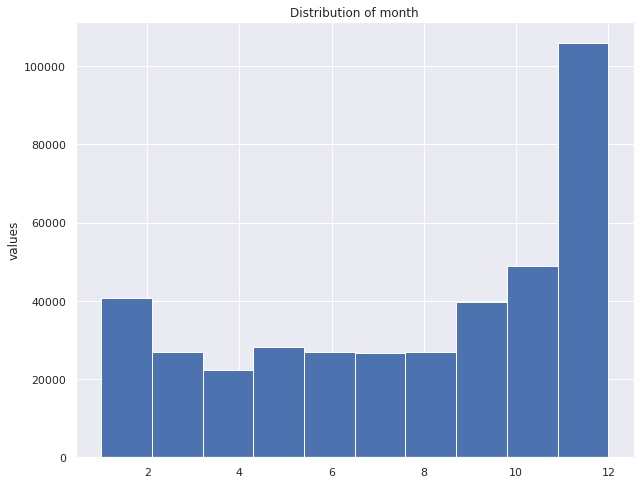

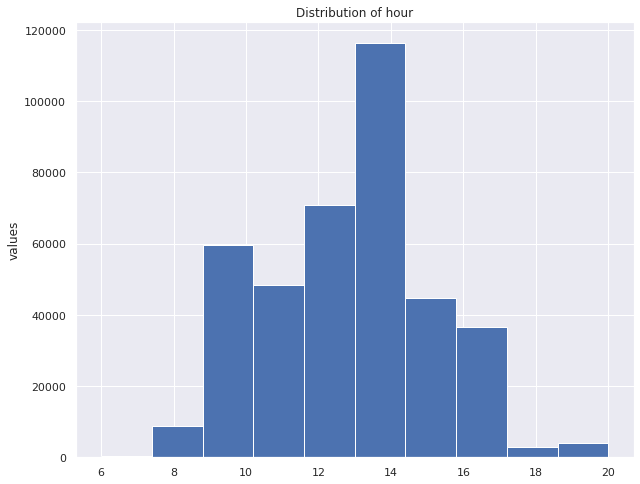

In [139]:
# Writting a for loop for outputting the distribution of the columns

for col in columns:
  plt.figure(figsize = (10,8))
  plt.hist(retail_df[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')

**Hypothesis:** Since the company is based out of UK, most of the customers must be from UK itself.

Text(0, 0.5, 'Counts')

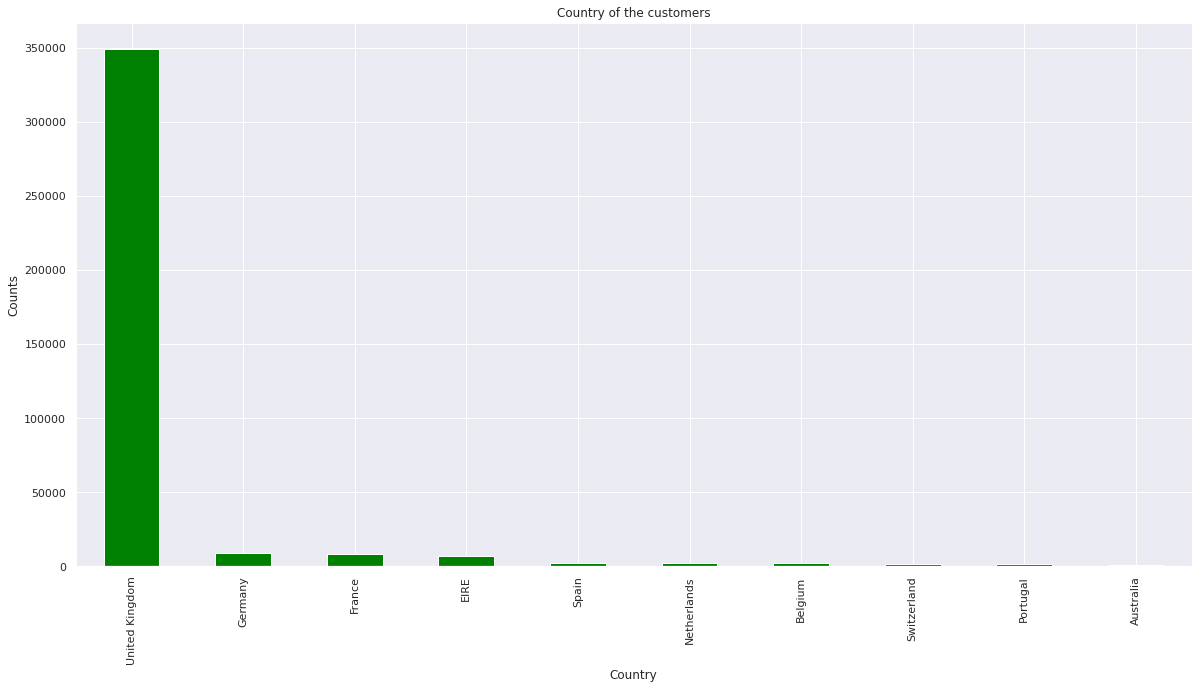

In [140]:
# Plotting the countries of the customers.

frequent_country_of_customers = retail_df['Country'].value_counts().head(10)
frequent_country_of_customers.plot(kind = 'bar',color = 'green')
plt.title('Country of the customers')
plt.xlabel('Country')
plt.ylabel('Counts')

**Analysis:** My hypothesis is indeed True.
___________________________________________________________________

Text(0.5, 1.0, 'Most Spend Customers')

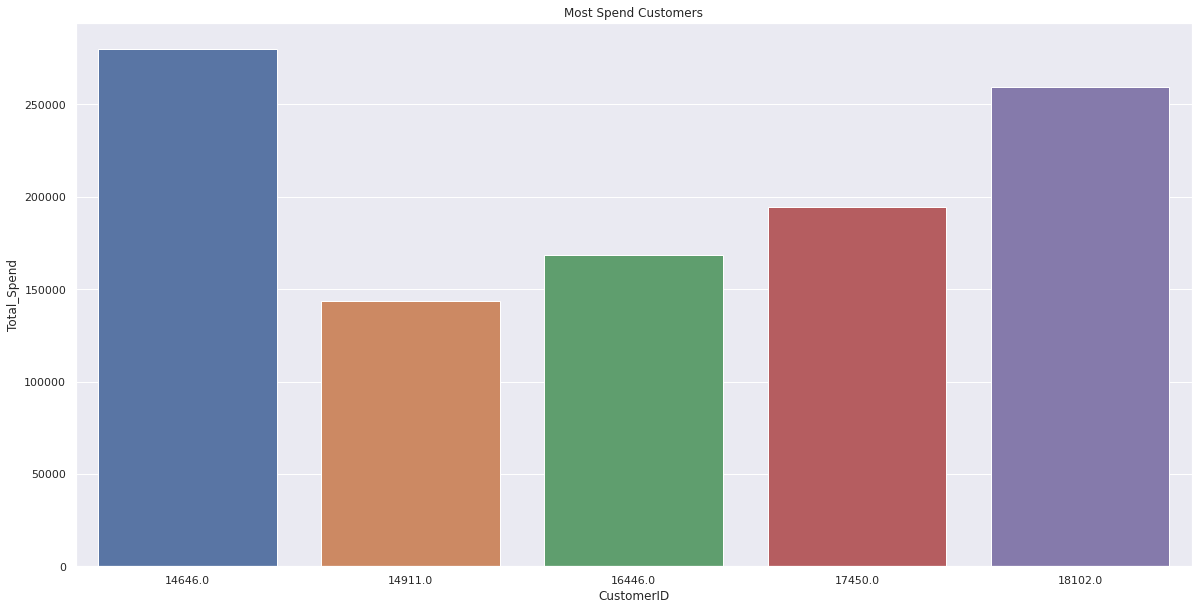

In [141]:
# Checking out the customer who spent the most money.

most_spend_customer = retail_df.groupby('CustomerID')['Total_Price'].sum().reset_index()\
                    .sort_values('Total_Price',ascending = False).head(5).rename(columns = {'Total_Price':'Total_Spend'})

sns.barplot(x = most_spend_customer['CustomerID'], y = most_spend_customer['Total_Spend'],data = most_spend_customer)

plt.title('Most Spend Customers')

**Hypothesis:** Sales will be more towards the end of the year because of festivals like Christmas.

([<matplotlib.axis.XTick at 0x7f97f47ce710>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

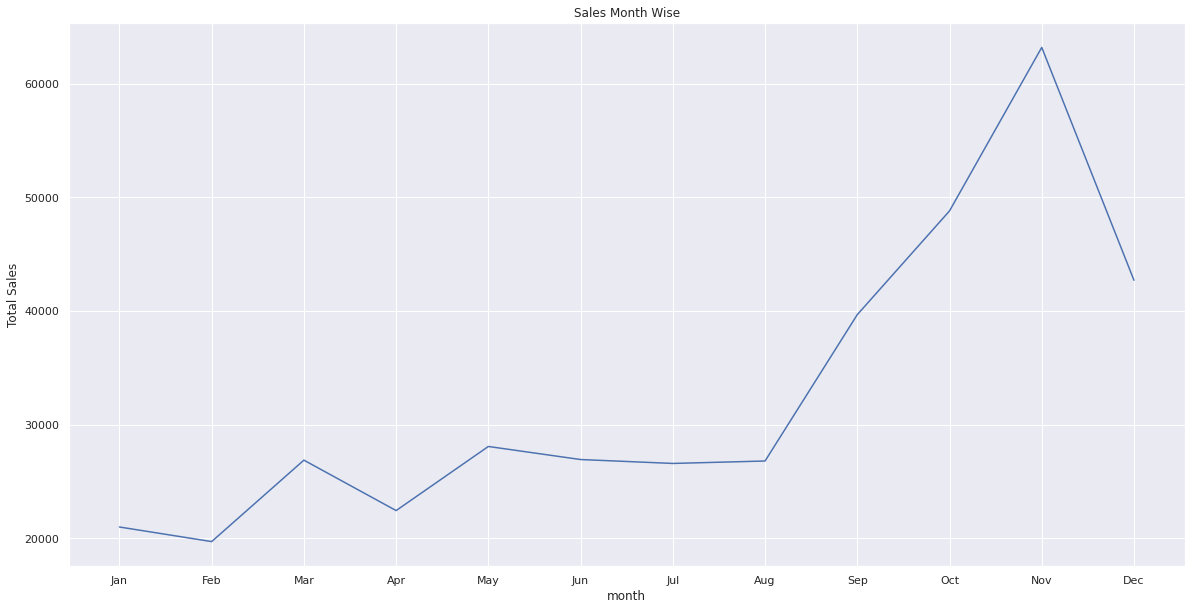

In [145]:
# Plotting the top months interms of sales.

top_months = retail_df.groupby('month')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending = False)\
            .rename(columns = {'InvoiceNo':'Total Sales'})

sns.lineplot(x = top_months['month'], y = top_months['Total Sales'], data = top_months)

plt.title('Sales Month Wise')
x = [1,2,3,4,5,6,7,8,9,10,11,12]
label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(x,label) # Changing the X axis labels to month names

**Analysis:** My hypothesis is True!
_____________________________________________________________________

**Hypothesis:** Customers place most of the orders during working hours.

Text(0.5, 1.0, 'Hour wise sales')

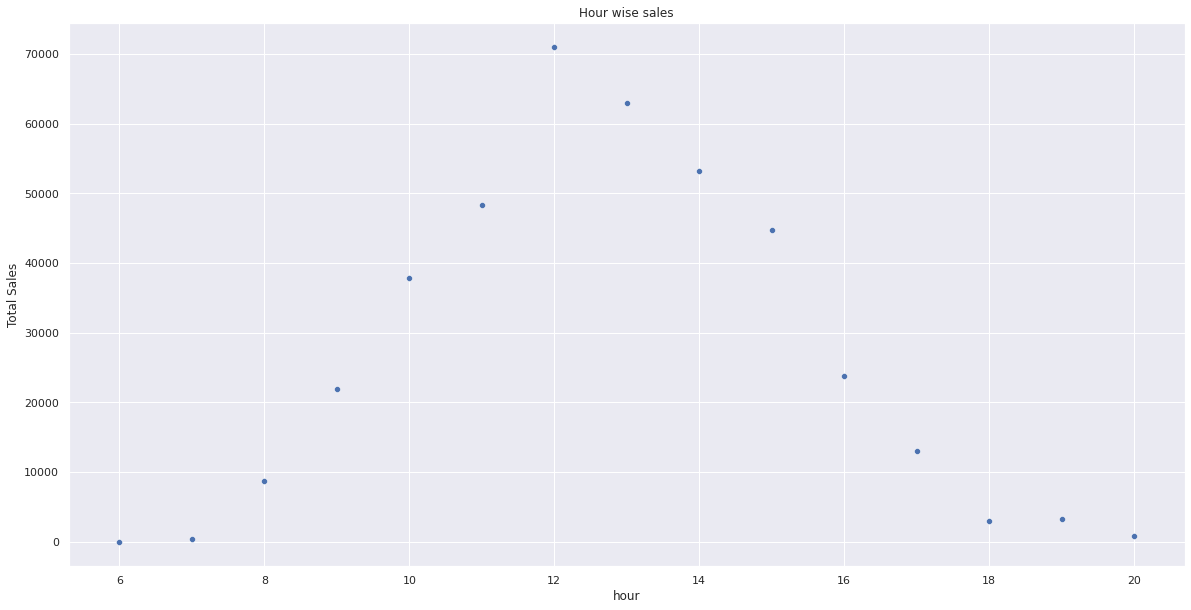

In [152]:
# Plotting hour wise sales.

hour_sales = retail_df.groupby('hour')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo':'Total Sales'})

sns.scatterplot(x = hour_sales['hour'], y = hour_sales['Total Sales'], data = hour_sales)
plt.title('Hour wise sales')

**Analysis:** Yayy!! My hypothesis is True!
__________________________________________________________________

In [159]:
# Calculating the revenue generated by customers for the year 2010

year_2010_df = retail_df[retail_df['year'] == 2010]
year_2011_df = retail_df[retail_df['year'] == 2011]

total_revenue_company_wise_2010 = year_2010_df.groupby('CustomerID')['Total_Price'].sum().reset_index().sort_values('Total_Price', ascending = False)
total_revenue_company_wise_2010.rename(columns = {'Total_Price':'Total_Spending_2010'},inplace = True)
total_revenue_company_wise_2010

,CustomerID,Total_Spending_2010
865,18102.0,27834.61
370,15061.0,19950.66
522,16029.0,13112.52
309,14646.0,8591.88
349,14911.0,7737.94
...,...,...
878,18225.0,30.00
818,17888.0,29.43
800,17816.0,16.21
485,15823.0,15.00


In [160]:
# Calculating the revenue generated by customers for the year 2011

total_revenue_company_wise_2011 = year_2011_df.groupby('CustomerID')['Total_Price'].sum().reset_index().sort_values('Total_Price', ascending = False)
total_revenue_company_wise_2011.rename(columns = {'Total_Price':'Total_Spending_2011'},inplace = True)
total_revenue_company_wise_2011

,CustomerID,Total_Spending_2011
1654,14646.0,271614.14
4087,18102.0,231822.69
3637,17450.0,192361.95
2937,16446.0,168472.50
1841,14911.0,135973.23
...,...,...
3459,17194.0,10.00
2943,16454.0,6.90
1757,14792.0,6.20
3137,16738.0,3.75


In [171]:
# Calulating the percentage increase in sales from 2010 to 2011 for various customers.

spending_df = pd.merge(total_revenue_company_wise_2011,total_revenue_company_wise_2010, how = 'outer', on = 'CustomerID')
spending_df['percentage_spending'] = ((spending_df['Total_Spending_2011'] - spending_df['Total_Spending_2010']) / spending_df['Total_Spending_2011']) * 100
top_spending_increase = spending_df.sort_values('percentage_spending', ascending = False)[:5]

Text(0.5, 1.0, 'Customers with the maxinum increase of Sales')

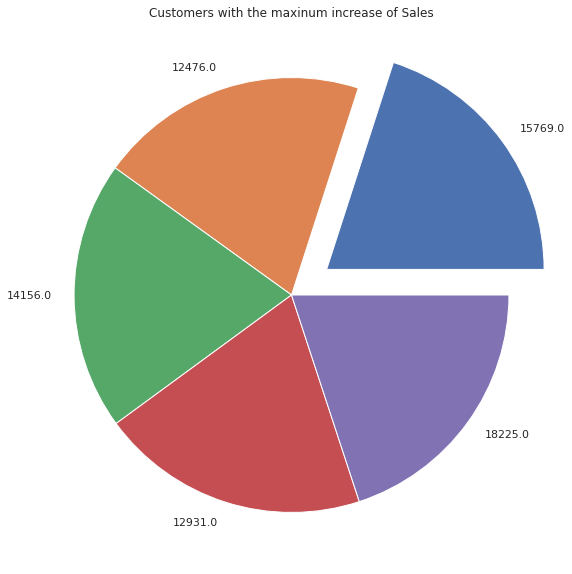

In [256]:
# Plotting a pie chart showing the top 5 customers who have the highest percentage increase.

myexplode = [0.2,0,0,0,0]
mylabels = list(top_spending_increase['CustomerID'])
y = np.array(top_spending_increase['percentage_spending'])
plt.pie(y,labels = mylabels,explode = myexplode)
plt.title('Customers with the maxinum increase of Sales')

## **RFM model (Recency, Frequency,Monetary value)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: 
* Recency: When was the last purchase made.
* Frequency: How often a customer makes a purchase. 
* Monetary Value: How much money a customer spends between a time interval. 

RFM process.
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).
* The third step is to add the RFM scores together.

In [280]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Last_Purchase,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010,12,Wednesday,8


In [292]:
# Creating a Recency df.

Recency_df = retail_df.groupby('CustomerID')['Last_Purchase'].min().reset_index().rename(columns = {'Last_Purchase':'Recency'})
Recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [293]:
# Creating a Frequency df.

Frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo':'Frequency'})
Frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [294]:
# Creating a Monetary df.

Monetary_df = retail_df.groupby('CustomerID')['Total_Price'].sum().reset_index().rename(columns = {'Total_Price':'Monetary'})
Monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [295]:
# Creating RFM_df.

RF_df = pd.merge(Recency_df,Frequency_df,how = 'inner',on = 'CustomerID')
RFM_df = pd.merge(RF_df,Monetary_df,how = 'inner',on = 'CustomerID')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [331]:
# Creating a function to that returns the percentile values of columns

def percentile(col,percentiles):

  '''This function takes datarame, list of percentiles as input and returns 
  the values of the inputted percentiles.'''

  percentile_dict = {}
  for i in percentiles:
    percentile_dict[i] = np.percentile(col,i)
  return percentile_dict

In [332]:
# Calculating the percentile values of Recency,Frequency,Monetary columns.

Recency_percentile = percentile(RFM_df['Recency'],[25,50,75])
Frequency_percentile = percentile(RFM_df['Frequency'],[25,50,75])
Monetary_percentile = percentile(RFM_df['Monetary'],[25,50,75])

In [336]:
# Encoding the values of the columns.

def Receny_encoding(row):
  if row < Recency_percentile[25]:
    return 4
  elif (row >= Recency_percentile[25]) & (row < Recency_percentile[50]):
    return 3
  elif (row >= Recency_percentile[50]) & (row < Recency_percentile[75]):
    return 2
  else:
    return 1

def Freqency_encoding(row):
  if row < Frequency_percentile[25]:
    return 1
  elif (row >= Frequency_percentile[25]) & (row < Frequency_percentile[50]):
    return 2
  elif (row >= Frequency_percentile[50]) & (row < Frequency_percentile[75]):
    return 3
  else:
    return 4

def Monetary_encoding(row):
  if row < Monetary_percentile[25]:
    return 1
  elif (row >= Monetary_percentile[25]) & (row < Monetary_percentile[50]):
    return 2
  elif (row >= Monetary_percentile[50]) & (row < Monetary_percentile[75]):
    return 3
  else:
    return 4

I have encoded the columns in such a way that, the higher the RFM socres the better the customer and vice-versa.

For low values of Recency, I have encoded them with high values and for high values of Recency, I have encoded them with low values.

For High values of Frequency, I have encoded them with high values and for low values of Frequency, I have encoded them with low values

For High values of Monetary, I have encoded them with high values and for low values of Monetary, I have encoded them with low values

In [339]:
# Applying the above encoding functions to the dataframe.

RFM_df['R'] = RFM_df['Recency'].apply(Receny_encoding)
RFM_df['F'] = RFM_df['Frequency'].apply(Freqency_encoding)
RFM_df['M'] = RFM_df['Monetary'].apply(Monetary_encoding)

RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,1,1,1
4335,18281.0,180,7,80.82,1,1,1
4336,18282.0,7,12,178.05,4,1,1
4337,18283.0,3,721,2045.53,4,4,4


In [340]:
# Calculating the RFM scores by adding the R,F,M columns.

RFM_df['RFM_score'] = RFM_df['R'] + RFM_df['F'] + RFM_df['M']
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score
0,12346.0,325,1,77183.60,1,1,4,6
1,12347.0,2,182,4310.00,4,4,4,12
2,12348.0,75,31,1797.24,2,2,4,8
3,12349.0,18,73,1757.55,3,3,4,10
4,12350.0,310,17,334.40,1,2,2,5


In [356]:
# Checking out the best and the worst customers.

RFM_score_percentiles = percentile(RFM_df['RFM_score'],[50,75])

In [357]:
# Segmenting the customers using RFM scores.

bad_customers = RFM_df[RFM_df['RFM_score'] < RFM_score_percentiles[50]]
print(f'There are {len(bad_customers)} bad customers')

Okay_customers = RFM_df[(RFM_df['RFM_score'] >= RFM_score_percentiles[50]) & (RFM_df['RFM_score'] < RFM_score_percentiles[75])]
print(f'There are {len(Okay_customers)} okay customers')

good_customers = RFM_df[RFM_df['RFM_score'] >= RFM_score_percentiles[75]]
print(f'There are {len(good_customers)} good customers')

There are 1755 bad customers
There are 1335 okay customers
There are 1249 good customers


I have segmented all those customers whose RFM_score < 7(50th percentile) as bad customers.

All those customers whose 7 <= RFM_score > 10 as okay customers

And all those customers whose RFM_score >= 10 as good customers

In [358]:
RFM_score_percentiles

{50: 7.0, 75: 10.0}